**#Visão Computacional - Aula 2**

Histograma e Thresholding(Binarização ou linearização)

#Importações

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Histograma




1.   Leitura e plotagem da imagem


---



*   Utilizando o cv2 para ler
*   Utilizando o matplotlib para plotar





O tipo da imagem é de <class 'numpy.ndarray'>
O shape da imagem é (800, 1600, 3)


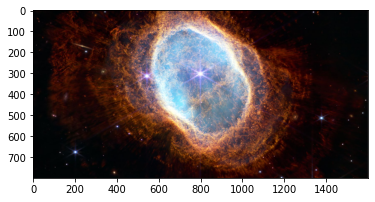

In [14]:
#lendo a imagem:
img = cv2.imread('web.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#plotagem e identificações:
plt.imshow(img_rgb)
print('O tipo da imagem é de {}'.format(type(img_rgb)))
print('O shape da imagem é {}'.format(img_rgb.shape))



```
Vale relembrar que a imagem quando é lida pelo cv2, já vem como array, ou seja
por conta desse fato, faz-se necessário a matplotlib para plotar a imagem.
```





2.   Plotando o Histograma




Criação dos histogramas - Histograma unico

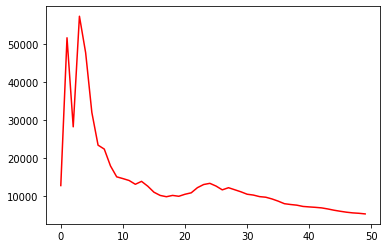

In [42]:
#aqui é só um exemplo de como montar um histograma - Note que foi utilizado o arquivo em BGR mesmo!
hist_red = cv2.calcHist([img],channels=[2], mask = None, histSize = [50],ranges = [0,50])

#plotando
plt.plot(hist_red, color = 'red')



```
⚠ Note que agora não é mais o plt.imshow, mas sim o plt.plot ⚠
```





```
Porém pode ser mais interessante montar logo os três histogramas juntos.
Para esse feito utilizaremos uma estrutura de repetição (for) para resolver
essa questão.
```



Histograma triplo

In [31]:
#Definindo os canais:
color = ('b','g','r') #Note que está em BRG!



```
Se faz necessário a definição dos canais para evitar qualquer problema futuro, e
note também que os canais serão feitos na ordem da imagem utilizada, ou seja:

Se for BRG, os canais serão definidos nessa ordem, se for RGB, serão definidos
dessa outra forma, etc.
```



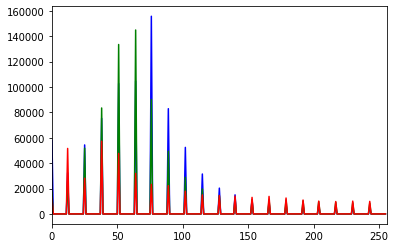

In [54]:
for i,col in enumerate(color):
  histr = cv2.calcHist([img],[i],None,[256],[0,20])
  plt.plot(histr, color = col)
  plt.xlim([0,256])
plt.show()



```
⚠ Apesar de ser fácil de se esquecer, a estrutura de repetição (o for no caso)
precisa ter não só o "i", mas também o "col"... Sem o "col", dá erro ⚠ 
```



#Thresholding (ou Binarização, ou linearização)



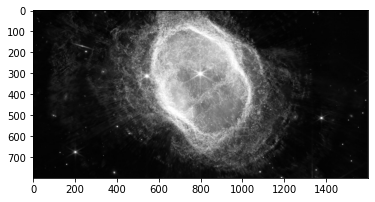

In [51]:
img_2 = cv2.imread('web.jpg', 0)
plt.imshow(img_2, cmap = "gray")



```
Importando novamente a imagem, não só para acompanhar o passo a passo do
professor mas também para importar uma segunda imagem em escala de cinza.

Particularmente ainda não vi muita diferença puxando com esse zero, haja visto
que para plotar uma imagem em escala de cinza como cinza ainda precias usar o
cmap... Porém, pode ser que faça diferença mais pra frente.
```



Máximos e Mínimos

In [58]:
print('Máximo igual a',img_2.max())
print('Minimo igual a',img_2.min())

Máximo igual a 255
Minimo igual a 0




```
Vale lembrar que uma imagem pode ter minimos e máximos diferentes dos valores
esperados ou seja, min > 0 ou max < 255.

Isso acontece em algumas imagens... É normal.
```





```
⚠ A ideia é fazer o Tresholding com a média absoluta 
(diferença entre max e min dos valores) ⚠
```



In [62]:
ret, img_thresh = cv2.threshold(img_2, 127,255, cv2.THRESH_BINARY)



```
Essa função de threshold do opencv recebe dois argumentos:
valor de retorno - No caso, o ret;
A propria imagem - No caso, a váriavel que eu chamei de img_thresh.
```



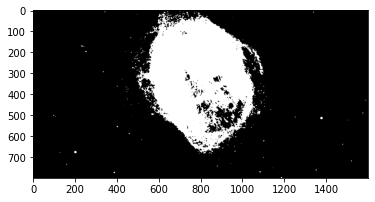

In [64]:
#plotando a imagem binarizada
plt.imshow(img_thresh, cmap = 'gray')

#Gradiente